In [58]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [59]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 15_12_2022 02_32_55.xlsx'

In [60]:
'''if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')'''

"if not os.path.exists(f'Z:\\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):\n    os.makedirs(f'Z:\\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')"

In [61]:
#dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 12_12_2022 07_32_58.xlsx')

In [62]:
dados['pos_pcrflu'] = dados['pos_pcrflu'].map({1:'Sim',2:'Nao',9:'Ignorado'})

In [63]:
dados['tp_flu_pcr'] = dados['tp_flu_pcr'].map({1:'Influenza A',2:'Influenza B'})

In [64]:
#dados['pcr_fluasu'] = dados['pcr_fluasu'].map({1:'Influenza A(H1N1)pdm09',2:'Influenza A(H3N2)',3:'Influenza A nao subtipado',
#4:'Influenza A nao subtipavel',5:'Inconclusivo',6:'Outro'})

In [65]:
dados['pcr_fluasu'] = dados['pcr_fluasu'].map({1:'Influenza A(H1N1)pdm09',2:'Influenza A(H3N2)',3:'Influenza nao subtipado',
4:'Influenza nao subtipado',5:'Influenza nao subtipado',6:'Influenza nao subtipado'})

In [66]:
filtro = dados[['Sem Epi Internacao','Classificacao final','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]
filtro

,Sem Epi Internacao,Classificacao final,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,2020_04,SRAG não especificado,NaN,NaN,NaN,NaN
1,2020_04,SRAG não especificado,NaN,NaN,NaN,NaN
2,2020_04,SRAG não especificado,NaN,NaN,NaN,NaN
3,2020_04,SRAG não especificado,NaN,NaN,NaN,NaN
4,2020_04,SRAG não especificado,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185526,2022_39,SRAG não especificado,NaN,NaN,NaN,NaN
185527,2022_44,COVID-19,Nao,NaN,NaN,1.0
185528,2022_37,SRAG não especificado,NaN,NaN,NaN,NaN
185529,2020_29,SRAG não especificado,NaN,NaN,NaN,NaN


In [67]:
base = filtro.groupby('Sem Epi Internacao').count()
base

,Classificacao final,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
Sem Epi Internacao,,,,,
2020_01,11,1,1,0,0
2020_02,24,0,0,0,0
2020_03,16,1,1,0,0
2020_04,22,1,1,0,0
2020_05,19,2,2,2,0
...,...,...,...,...,...
2022_45,189,35,2,2,15
2022_46,229,46,3,3,8
2022_47,238,76,8,8,9


In [68]:
influH1 = filtro.loc[filtro['pcr_fluasu']=='Influenza A(H1N1)pdm09'] #pega as linhas onde tem Influenza A(H1N1)pdm09
influH1 = influH1.groupby('Sem Epi Internacao').count() #Agrupa por semana de internação e faz uma contagem
influH1 = influH1.merge(base, how='outer',right_index=True, left_index=True) #Apenas para ter todas as semanas, mesmo que zeradas
influH1 = influH1.fillna(0) #Substitui NaN (vazio) por zero
influH1

,Classificacao final_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
Sem Epi Internacao,,,,,,,,,,
2020_01,0.0,0.0,0.0,0.0,0.0,11,1,1,0,0
2020_02,0.0,0.0,0.0,0.0,0.0,24,0,0,0,0
2020_03,0.0,0.0,0.0,0.0,0.0,16,1,1,0,0
2020_04,0.0,0.0,0.0,0.0,0.0,22,1,1,0,0
2020_05,2.0,2.0,2.0,2.0,0.0,19,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...
2022_45,2.0,2.0,2.0,2.0,0.0,189,35,2,2,15
2022_46,2.0,2.0,2.0,2.0,0.0,229,46,3,3,8
2022_47,7.0,7.0,7.0,7.0,0.0,238,76,8,8,9


In [69]:
influH1 = influH1['pcr_fluasu_x'] #Pega os valores da coluna pcr_fluasu_x

In [70]:
influH3 = filtro.loc[filtro['pcr_fluasu']=='Influenza A(H3N2)'] #pega as linhas onde tem Influenza A(H3N2)
influH3 = influH3.groupby('Sem Epi Internacao').count() #Agrupa por semana de internação e faz uma contagem
influH3 = influH3.merge(base, how='outer',right_index=True, left_index=True) #Apenas para ter todas as semanas, mesmo que zeradas
influH3 = influH3.fillna(0) #Substitui NaN (vazio) por zero
influH3

,Classificacao final_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
Sem Epi Internacao,,,,,,,,,,
2020_01,0.0,0.0,0.0,0.0,0.0,11,1,1,0,0
2020_02,0.0,0.0,0.0,0.0,0.0,24,0,0,0,0
2020_03,0.0,0.0,0.0,0.0,0.0,16,1,1,0,0
2020_04,0.0,0.0,0.0,0.0,0.0,22,1,1,0,0
2020_05,0.0,0.0,0.0,0.0,0.0,19,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...
2022_45,0.0,0.0,0.0,0.0,0.0,189,35,2,2,15
2022_46,0.0,0.0,0.0,0.0,0.0,229,46,3,3,8
2022_47,0.0,0.0,0.0,0.0,0.0,238,76,8,8,9


In [71]:
influH3 = influH3['pcr_fluasu_x'] #Pega os valores da coluna pcr_fluasu_x

In [72]:
influNaoSubtipado = filtro.loc[filtro['pcr_fluasu']=='Influenza nao subtipado'] #pega as linhas onde tem Influenza nao subtipado
influNaoSubtipado = influNaoSubtipado.groupby('Sem Epi Internacao').count() #Agrupa por semana de internação e faz uma contagem
influNaoSubtipado = influNaoSubtipado.merge(base, how='outer',right_index=True, left_index=True) #Apenas para ter todas as semanas, mesmo que zeradas
influNaoSubtipado = influNaoSubtipado.fillna(0) #Substitui NaN (vazio) por zero
influNaoSubtipado

,Classificacao final_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
Sem Epi Internacao,,,,,,,,,,
2020_01,0.0,0.0,0.0,0.0,0.0,11,1,1,0,0
2020_02,0.0,0.0,0.0,0.0,0.0,24,0,0,0,0
2020_03,0.0,0.0,0.0,0.0,0.0,16,1,1,0,0
2020_04,0.0,0.0,0.0,0.0,0.0,22,1,1,0,0
2020_05,0.0,0.0,0.0,0.0,0.0,19,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...
2022_45,0.0,0.0,0.0,0.0,0.0,189,35,2,2,15
2022_46,1.0,1.0,1.0,1.0,0.0,229,46,3,3,8
2022_47,1.0,1.0,1.0,1.0,0.0,238,76,8,8,9


In [73]:
influNaoSubtipado = influNaoSubtipado['pcr_fluasu_x'] #Pega os valores da coluna pcr_fluasu_x

In [74]:
influB = filtro.loc[filtro['tp_flu_pcr']=='Influenza B'] #pega as linhas onde tem Influenza B
influB = influB.groupby('Sem Epi Internacao').count() #Agrupa por semana de internação e faz uma contagem
influB = influB.merge(base, how='outer',right_index=True, left_index=True) #Apenas para ter todas as semanas, mesmo que zeradas
influB = influB.fillna(0) #Substitui NaN (vazio) por zero
influB

,Classificacao final_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
Sem Epi Internacao,,,,,,,,,,
2020_01,1.0,1.0,1.0,0.0,0.0,11,1,1,0,0
2020_02,0.0,0.0,0.0,0.0,0.0,24,0,0,0,0
2020_03,1.0,1.0,1.0,0.0,0.0,16,1,1,0,0
2020_04,1.0,1.0,1.0,0.0,0.0,22,1,1,0,0
2020_05,0.0,0.0,0.0,0.0,0.0,19,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...
2022_45,0.0,0.0,0.0,0.0,0.0,189,35,2,2,15
2022_46,0.0,0.0,0.0,0.0,0.0,229,46,3,3,8
2022_47,0.0,0.0,0.0,0.0,0.0,238,76,8,8,9


In [75]:
influB = influB['tp_flu_pcr_x'] #Pega os valores da coluna pcr_fluasu_x

In [76]:
vsr = filtro.loc[filtro['pcr_vsr']==1] #Pega as linhas onde é igual a 1 na coluna pcr_vsr (positivo para VSR)
vsr = vsr.groupby('Sem Epi Internacao').count() #Agrupa por semana de internação e faz uma contagem
vsr = vsr.reset_index() #Apenas reseta o index do DataFrame (tabela)
vsr = vsr.merge(base, how='right', on='Sem Epi Internacao') #Apenas para ter todas as semanas, mesmo que zeradas
vsr

,Sem Epi Internacao,Classificacao final_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
0,2020_01,NaN,NaN,NaN,NaN,NaN,11,1,1,0,0
1,2020_02,NaN,NaN,NaN,NaN,NaN,24,0,0,0,0
2,2020_03,NaN,NaN,NaN,NaN,NaN,16,1,1,0,0
3,2020_04,NaN,NaN,NaN,NaN,NaN,22,1,1,0,0
4,2020_05,NaN,NaN,NaN,NaN,NaN,19,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
149,2022_45,15.0,13.0,0.0,0.0,15.0,189,35,2,2,15
150,2022_46,8.0,5.0,0.0,0.0,8.0,229,46,3,3,8
151,2022_47,9.0,7.0,0.0,0.0,9.0,238,76,8,8,9
152,2022_48,15.0,12.0,0.0,0.0,15.0,319,77,5,5,15


In [77]:
vsr = vsr.fillna(0) #Substitui NaN (vazio) por zero
vsr = vsr['pcr_vsr_x'] #Pega os valores da coluna pcr_vsr_x
vsr

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
149    15.0
150     8.0
151     9.0
152    15.0
153     6.0
Name: pcr_vsr_x, Length: 154, dtype: float64

In [78]:
semana = base.reset_index()
semana = semana['Sem Epi Internacao'] #Pega os valores da coluna Sem Epi Internacao
semana

0      2020_01
1      2020_02
2      2020_03
3      2020_04
4      2020_05
        ...   
149    2022_45
150    2022_46
151    2022_47
152    2022_48
153    2022_49
Name: Sem Epi Internacao, Length: 154, dtype: object

In [79]:
#Pega o tamanho da variavel tamanho e faz com que o eixo x pule os valores de 2 em 2
tamanho_semana = np.size(semana) #Pega o tamanho (numero de linhas) da variavel semana
eixo_x = np.arange(0,tamanho_semana,2) #Controi o eixo x do grafico (começa em 0, vai até o total de linhas da variavel tamanho_semana, pulando de 2 em 2)

In [80]:
legenda = pd.DataFrame(columns=['VSR','Influenza A H1N1','Influenza A H3N2','Influenza A Sem Subtipo','Influenza B']) #Cria a legenda para o gráfico

In [81]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 13_12_2022'

Text(0, 0.5, 'Casos de SRAG hospitalizados')

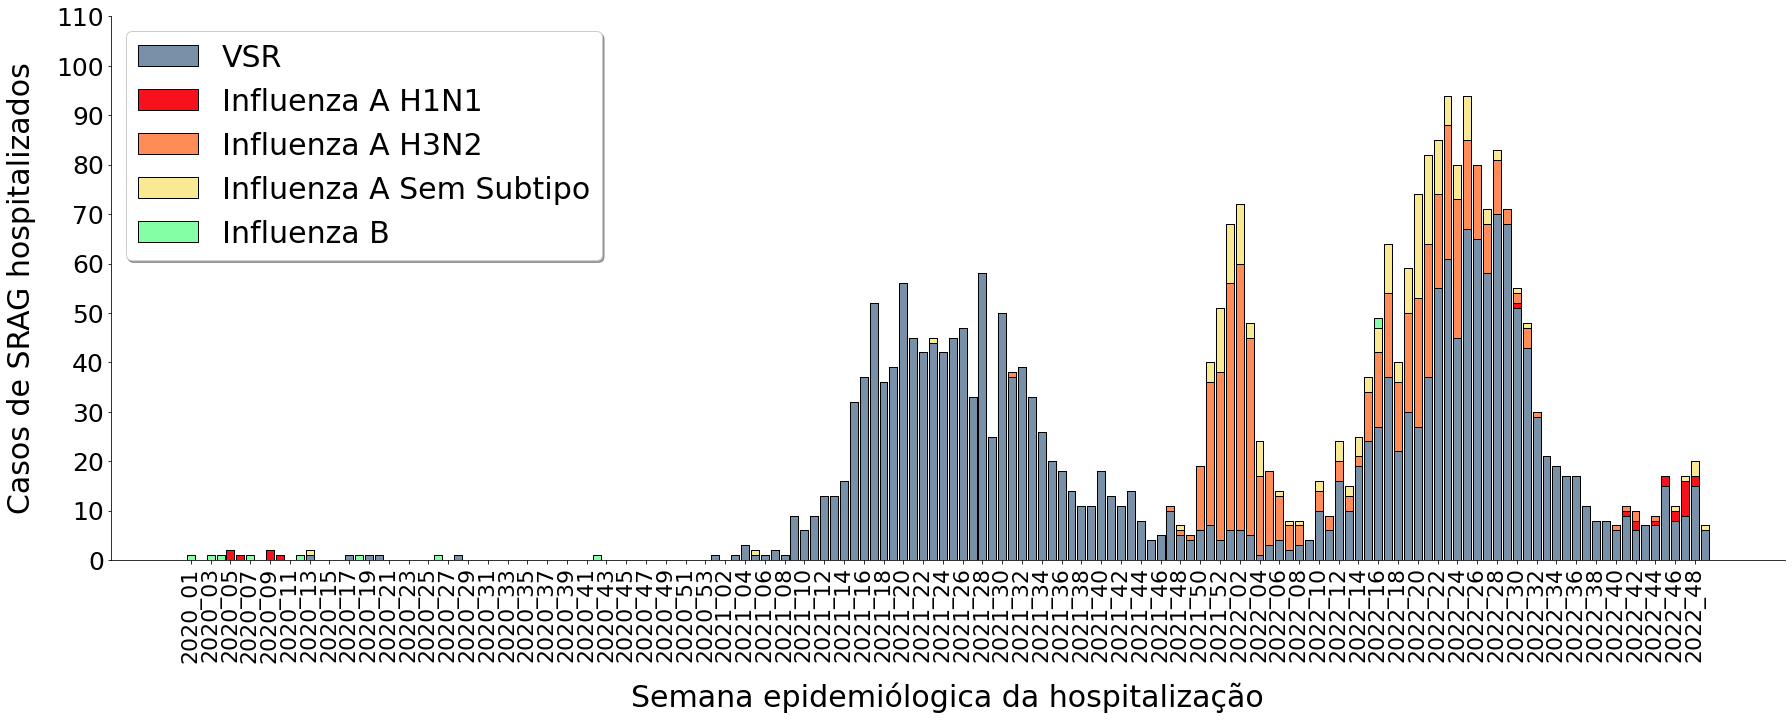

In [82]:
#Plotagem do grafico
plt.figure(figsize=(30,10))
plt.bar(semana,vsr, color = '#7890a8',edgecolor='#000000')
plt.bar(semana,influH1, bottom=np.array(vsr),color = '#f7111d',edgecolor='#000000')
plt.bar(semana,influH3, bottom=np.array(vsr)+np.array(influH1), color = '#ff8c57',edgecolor='#000000')
plt.bar(semana,influNaoSubtipado, bottom=np.array(vsr)+np.array(influH1)+np.array(influH3), color = '#fae993',edgecolor='#000000')
plt.bar(semana,influB, bottom=np.array(vsr)+np.array(influH1)+np.array(influH3)+np.array(influNaoSubtipado),color = '#85ffa5',edgecolor='#000000')
sns.despine()
plt.legend(legenda, fontsize=30,shadow=True,loc='upper left')
plt.xticks(eixo_x,rotation=90,fontsize=22)
plt.yticks(np.arange(0,120,10),fontsize=25)
plt.xlabel('Semana epidemiólogica da hospitalização',labelpad=20,fontsize=30)
plt.ylabel('Casos de SRAG hospitalizados',labelpad=20,fontsize=30)
#plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/casosHosp_InfluVSR.png',dpi=720,bbox_inches='tight')